# MUDBENCS CTD Data Visualization

This notebook allows the visualization of CTD data from Seabird .cnv files that are acquired by the Walton Smith CTD data system. 

In [1]:
#Import packages

from seabird.cnv import fCNV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB


(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


In [2]:
dat_nc = fCNV('WS23139_STN05_04CTD.cnv')
print(dat_nc.attributes.keys())

dict_keys(['sbe_model', 'LATITUDE', 'LONGITUDE', 'gps_datetime', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])


In [3]:
print('The profile coordinates are latitude: %.4f, and longitude: %.4f, collected at ' % (dat_nc.attributes['LATITUDE'], dat_nc.attributes['LONGITUDE']), dat_nc.attributes['gps_datetime'])
print('Data types available are: ', dat_nc.keys())


The profile coordinates are latitude: 1.6102, and longitude: -49.5952, collected at  Jun 08 2023 19:21:18
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']


[]

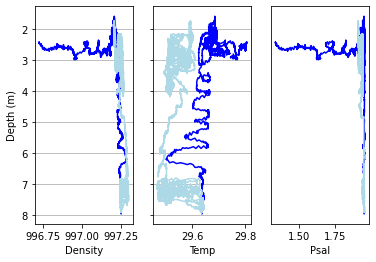

In [5]:
#Plot the CTD profiles:
MB.DEBUG = False
down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, ['density', 'TEMP', 'PSAL'], direction='both')
plt.gca().set_yticks([])

#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/09CTD_temp_SSS_rho.svg', dpi=300)

### Multiple Profiles

Now that we can plot profiles from multiple variables at one station, we can use the combination of casts and variables to plot profiles for all stations and save them to a directory. Below, we manually create a list of stations for which we would like to save a profile and then we run a loop through that list to plot the profiles, create a unique and logical file name, and save the file to a directory.

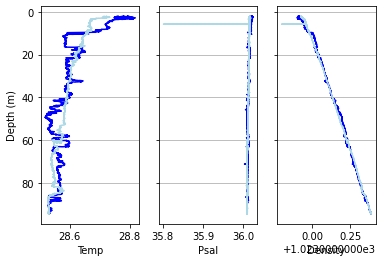

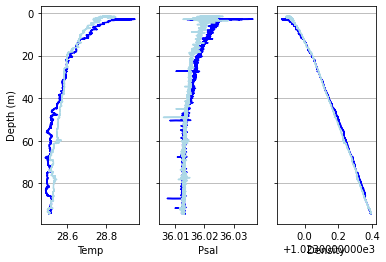

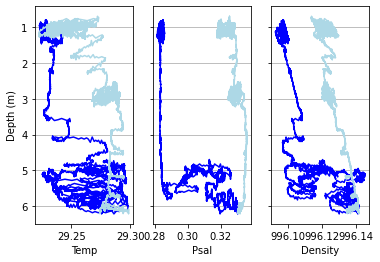

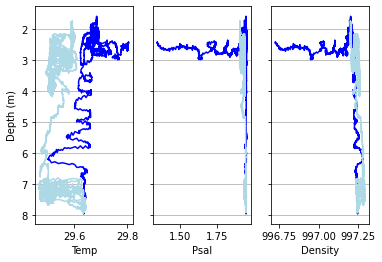

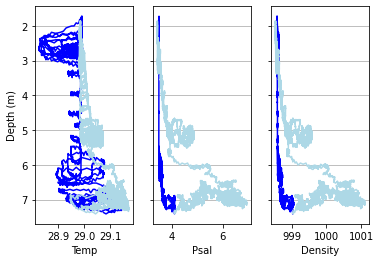

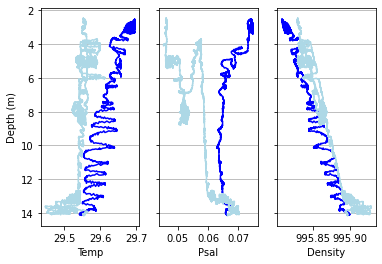

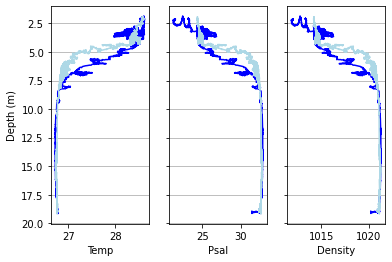

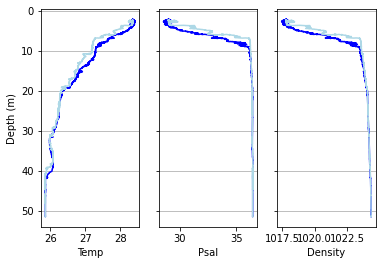

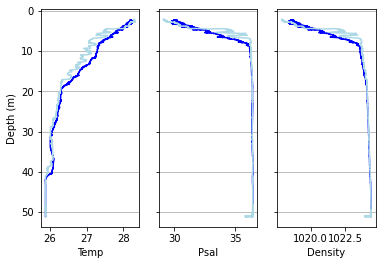

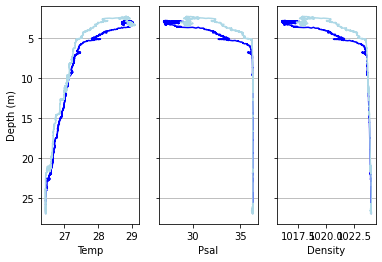

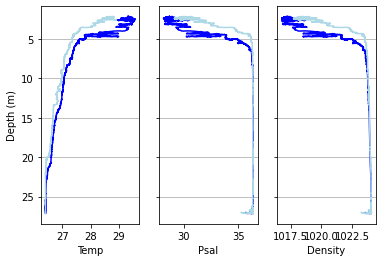

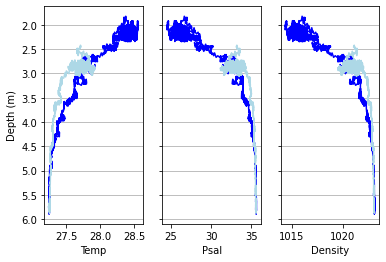

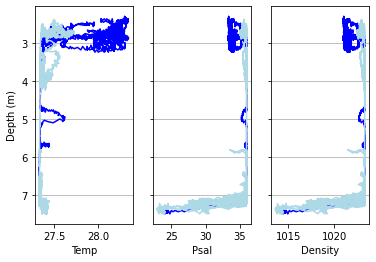

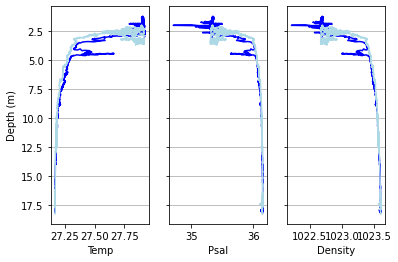

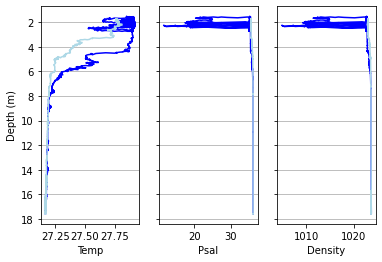

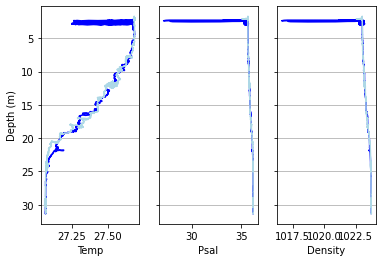

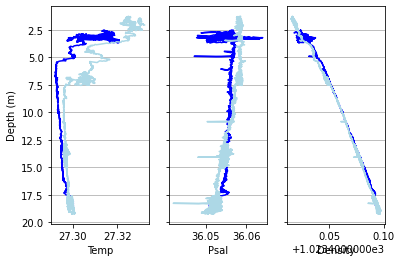

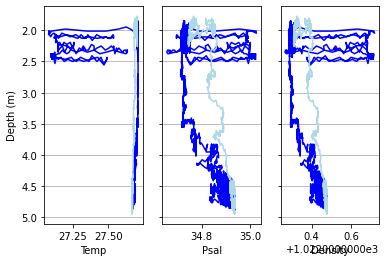

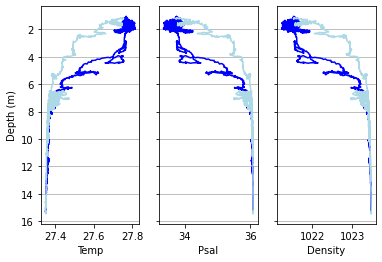

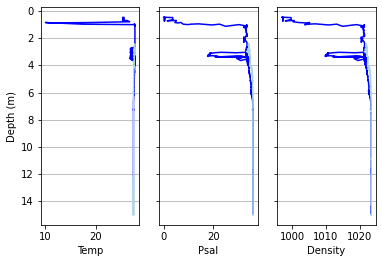

In [ ]:
#Create list of stations and sequential CTDs
CTD_list = [
    'STN02_01CTD',
    'STN02_02CTD',
    'STN04_03CTD',
    'STN05_04CTD',
    'STN06_05CTD',
    'STN07_06CTD',
    'STN08_07CTD',
    'STN10_08CTD',
    'STN10_09CTD',
    'STN11_10CTD',
    'STN11_11CTD',
    'STN12_12CTD',
    'STN15_13CTD',
    'STN16_14CTD',
    'STN16_15CTD',
    'STN17_16CTD',
    'STN18_17CTD',
    'STN20_18CTD',
    'STN21_19CTD',
    'STN21_20CTD'
]

#Specify Directory:
directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data'

#Iterate through the list, processing and saving files
for z, ctd in enumerate(CTD_list):
    filein = 'WS23139_'+ctd+'.cnv'      #Construct filename for cnv files (inputs)
    dat_nc = fCNV(filein)
    down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, [ 'TEMP', 'PSAL', 'density'], direction='both')
    directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data'
    fileout = 'WS23139_'+ctd+'Temp_Sal_Rho.svg'
    plt.savefig(directory+'/'+fileout, dpi=300)
    
    

## Read Along Track Data
Along with CTD data, the WS23-139 cruise had along track data. Here we read those data into this workbook and plot some of the data. 

In [8]:
#Read in the along track data. Set the variable MB.DEBUG to True to print the colunm names. 
MB.DEBUG = True
AT_data_df = MB.read_along_track_data('Both')
print(AT_data_df.shape)

(Index(['Date_Time', 'GPS1 Lat', 'Dir', 'Lon', 'Dir.1', 'SOG Knots',
       'COG Deg. True', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'GPS2 Lat', 'Dir.2',
       'Lon.1', 'Dir.3', 'SOG Knots.1', 'COG Deg. True.1', 'Lat Dec. Deg..1',
       'Lon Dec. Deg..1', 'Gyro', 'Water Speed F/A Spd. Knots',
       'P/S Spd. Knots', 'PIR w/m^2', 'PSP w/m^2', 'TUV w/m^2',
       'Rain Gauge Cond. Code', 'Inst. Precip. mm/hr', 'Accum. Precip. mm',
       'Depth Feet', 'Meters', 'Fathoms', 'Fluorometer Reading Volts', 'Gain',
       'DisOrgMat Reading Volts', 'Gain.1', 'SBTemp Degrees C', 'POSMV Lat',
       'Dir.4', 'Lon.2', 'Dir.5', 'SOG Knots.2', 'COG Degrees T',
       'Lat Dec. Deg..2', 'Lon Dec. Deg..2', 'POSMV Heading Degrees T',
       'RM Young Barometer mb', 'Stbd RM Young Winds Rel. Wind Spd. Knots',
       'Rel. Wind Dir. Degrees', 'True Wind Spd. Knots',
       'True Wind Dir. Degrees', 'Port RM Young Met Air Temp. Degrees C',
       'Rel. Humid. %', 'Baro. Press. mb', 'MicroTSG1 Temperature Deg

## Map Along-track Data
The following cell allows you to plot any of the variables represented by the columns in the DataFrame resulting from read_along_track_data. Default variable is `' Salinity PSU'` - if you enter a non-existent variable or misspell the variable, it will return to Salinity. Additionally, the map axes are returned so you can add points or other information (vector fields, annotations, images, etc.). Below, you can add a point that was recorded in the ship logs as a frontal boundary seen on radar. This point coincides nicely with the very high Chlorophyll-a data which are plotted. You can also add all of the points for which we have CTD data.

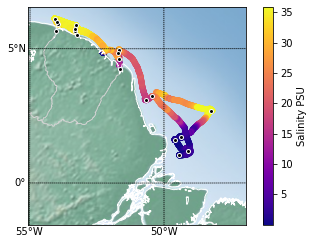

In [ ]:
m = MB.MUDBENCS_map(AT_data_df, ' Salinity PSU')
#Add position of recorded front, for demonstration how to access the map axes m:
#This plots well if you change the variable selected called in the first line of the cell by MUDBENCS_map
front_lat = 2+20.3687/60
front_lon = -(48+31.416/60)
#Uncomment the line below to add this point:
#m.plot(front_lon, front_lat, latlon=True, marker='s', markersize=10, color='None', markeredgecolor='k')

#Add all stations for which we have CTD data (all stations which do not contain the word "Test" in their names):
stations = pd.read_csv('MUDBENCS_Stations.csv')
#Plot only the stations that were sampled with CTD or sediment devices (not the flow-through system only stations)
sample_stations = stations[~stations['Station Name'].str.contains('Test')]
#Add to plot:
m.plot(sample_stations['Lon'], sample_stations['Lat'], latlon=True, marker='.', markersize=8, color='k', mec='white', linestyle='')

#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/Salinity_w_stations.svg', dpi=300)

In [ ]:
#Syntax for inspecting station coordinates

print(stations[stations['Station Name'].str.contains('Oyapock')])

       Station Name       Lat        Lon
9     Oyapock Outer  4.966783 -51.672862
10      Oyapock Mid  4.827228 -51.721250
11    Oyapock Inner  4.623492 -51.682839
12  Oyapock Estuary  4.250210 -52.628320


## Calculate the average position and approximate motion on-station

Using the read_along_track_data function, you can get on-station data by inserting a manual begin_end list of strings. Here, the calculation of the average lat and lon for Station 02 (Seawater Endmember) is shown. More complex calculations can be carried out for each station, but this simple one uses the pandas functions operable on dataframes. The values in square brackets and single quotes are the names of columns of data, and they must match exactly entries from the list of column names. You can see the column names by changing MB.DEBUG to True. 

In [ ]:
MB.DEBUG = False
Station_data_df = MB.read_along_track_data(['16 Jun 2023 18:35', '16 Jun 2023 20:15'])
mean_lat = Station_data_df['Lat Dec. Deg.'].mean()
mean_lon = Station_data_df['Lon Dec. Deg.'].mean()
std_lat = Station_data_df['Lat Dec. Deg.'].std()
std_lon = Station_data_df['Lon Dec. Deg.'].std()

print('Mean Lat (std) = %.4f (%.3f), Mean Lon (std) = %.4f (%.3f) ' % (mean_lat, std_lat, mean_lon, std_lon))

Mean Lat (std) = 5.8863 (0.019), Mean Lon (std) = -53.9354 (0.017) 


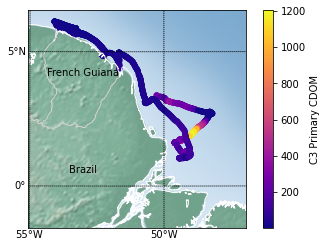

In [23]:
m = MB.MUDBENCS_map(AT_data_df, ' C3 Primary CDOM')

#Add Country names
lon = (-53, -53)
lat = (4.1, 0.5)
names = ['French Guiana', 'Brazil']
X,Y = m(lon,lat)
for i, (X, Y) in enumerate(zip(X, Y), start=0):
    plt.text(X, Y, names[i], ha='center', color='k')
plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/CDOM.svg', dpi=300)